<a href="https://colab.research.google.com/github/harshbhanu0/GFG-21-Projects-21-Days-ML-Deep-Learning-GenAI---Live/blob/main/Day-4/Project_4_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 4: Heart Disease Prediction**

**Workshop:** Geeks for Geeks 21 Projects, 21 Days: ML, Deep Learning & GenAI

**Date:** October 16, 2025

**Author:** Harsh Bhanushali

**Objective:** Develop a classification model to predict heart disease, including EDA, preprocessing, model training (Logistic Regression and Random Forest), evaluation with accuracy, precision, recall, F1-score, confusion matrix, and feature importance.

**Step 1: Import Libraries**

Import libraries for data processing, visualization, and modeling.

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

**Step 2: Load the Dataset**

Load the Heart Disease UCI dataset.

In [ ]:
heart_df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')
# Encode 'sex' column if it contains strings
if heart_df['sex'].dtype == 'object':
    heart_df['sex'] = heart_df['sex'].map({'Male': 1, 'Female': 0})
    heart_df['sex'] = heart_df['sex'].fillna(0)  # Handle any unmapped values
# Encode 'cp' (chest pain type)
if heart_df['cp'].dtype == 'object':
    heart_df['cp'] = heart_df['cp'].map({
        'typical angina': 1,
        'atypical angina': 2,
        'non-anginal pain': 3,
        'asymptomatic': 0
    })
    heart_df['cp'] = heart_df['cp'].fillna(0)  # Handle any unmapped values
# Encode 'thal' (thalassemia)
if heart_df['thal'].dtype == 'object':
    heart_df['thal'] = heart_df['thal'].map({
        'normal': 3,
        'fixed defect': 6,
        'reversible defect': 7
    })
    heart_df['thal'] = heart_df['thal'].fillna(3)  # Handle any unmapped values
# Encode 'restecg' (resting electrocardiographic results)
if heart_df['restecg'].dtype == 'object':
    heart_df['restecg'] = heart_df['restecg'].map({
        'normal': 0,
        'st-t abnormality': 1,
        'lv hypertrophy': 2
    })
    heart_df['restecg'] = heart_df['restecg'].fillna(0)  # Handle any unmapped values
# Encode 'slope' (slope of the peak exercise ST segment)
if heart_df['slope'].dtype == 'object':
    heart_df['slope'] = heart_df['slope'].map({
        'upsloping': 1,
        'flat': 2,
        'downsloping': 3
    })
    heart_df['slope'] = heart_df['slope'].fillna(2)  # Handle any unmapped values
# Handle missing values in all feature columns
feature_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
heart_df[feature_cols] = heart_df[feature_cols].apply(pd.to_numeric, errors='coerce')  # Ensure numeric
heart_df[feature_cols] = heart_df[feature_cols].fillna(heart_df[feature_cols].median())  # Fill NaN with median
# Rename 'num' to 'target' and convert to binary (0: no disease, 1: disease)
heart_df = heart_df.rename(columns={'num': 'target'})
heart_df['target'] = heart_df['target'].apply(lambda x: 1 if x >= 1 else 0)
print("Dataset Loaded")
print("\nFirst 5 Rows:")
display(heart_df.head())
print("\nShape:", heart_df.shape)

Dataset Loaded

First 5 Rows:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,1,Cleveland,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,2,67,1,Cleveland,0.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,3,67,1,Cleveland,0.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,3.0,1
3,4,37,1,Cleveland,0.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,5,41,0,Cleveland,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0



Shape: (920, 16)


**Step 3: Exploratory Data Analysis**

Analyze features to identify patterns distinguishing classes.

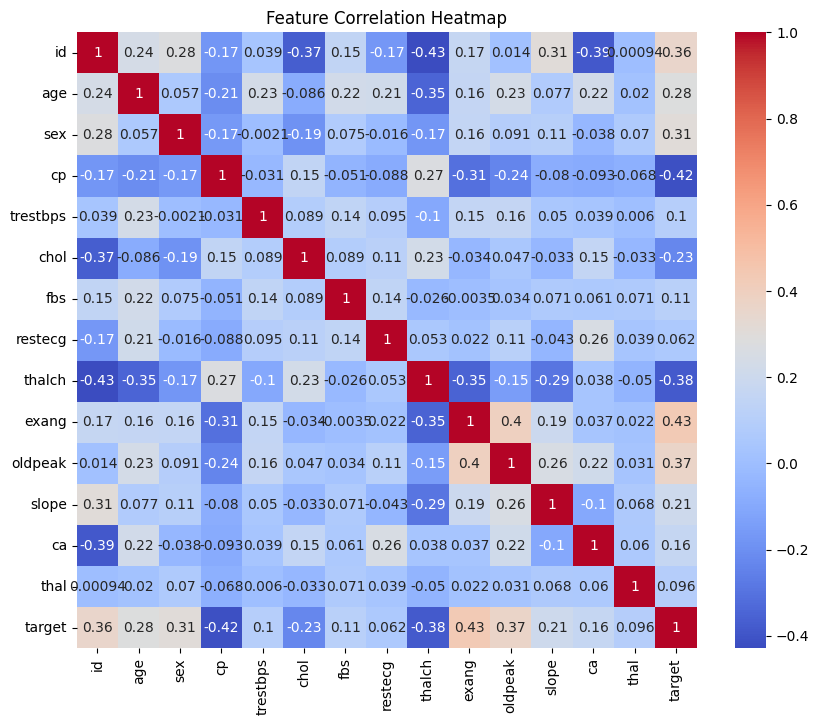

In [ ]:
# Correlation heatmap (only numeric columns)
corr = heart_df.select_dtypes(include=['int64', 'float64']).corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Feature Correlation Heatmap')
plt.show()

# Target distribution
fig = px.histogram(heart_df, x='target', title='Target Distribution (0: No Disease, 1: Disease)',
                   labels={'target': 'Target'}, color_discrete_sequence=['#636EFA'])
fig.update_layout(title_x=0.5, xaxis_title='Target', yaxis_title='Count')
fig.show()

# Age vs. Max Heart Rate by Target
fig = px.scatter(heart_df, x='age', y='thalch', color='target',
                 title='Age vs. Max Heart Rate by Target',
                 labels={'age': 'Age', 'thalch': 'Max Heart Rate', 'target': 'Target'},
                 color_discrete_sequence=['#636EFA', '#EF553B'])
fig.update_layout(title_x=0.5, xaxis_title='Age', yaxis_title='Max Heart Rate')
fig.show()

# Chest Pain Type by Target
fig = px.bar(heart_df, x='cp', color='target', barmode='group',
             title='Chest Pain Type by Target',
             labels={'cp': 'Chest Pain Type', 'count': 'Count', 'target': 'Target'},
             category_orders={'cp': [0, 1, 2, 3]})
fig.update_layout(title_x=0.5, xaxis_title='Chest Pain Type', yaxis_title='Count')
fig.show()

**Finding:** Strong correlations exist between target and features like cp (chest pain), thalch (max heart rate), and oldpeak (ST depression). The dataset is balanced, with higher max heart rates and specific chest pain types associated with disease presence.

**Step 4: Data Preprocessing**

Prepare data for classification models using encoding and scaling.

    Feature Scaling: Apply StandardScaler to numerical features.

    No Encoding Needed: All features are numerical in this dataset.

In [ ]:
# Drop non-relevant columns and target
X = heart_df.drop(['target', 'id', 'dataset'], axis=1)
y = heart_df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Step 5: Model Training**

Train Logistic Regression and Random Forest models.

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

**Step 6: Model Evaluation**

Evaluate models using accuracy, precision, recall, F1-score, and confusion matrix.

Logistic Regression Metrics:
Accuracy: 0.7935, Precision: 0.8737, Recall: 0.7615, F1-Score: 0.8137


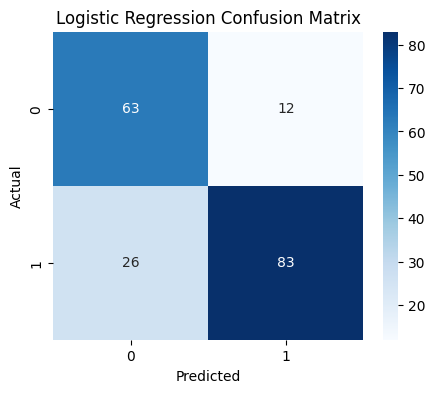

Random Forest Metrics:
Accuracy: 0.8587, Precision: 0.8952, Recall: 0.8624, F1-Score: 0.8785


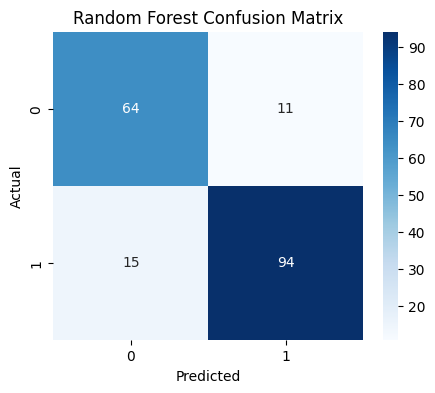

In [ ]:
# Logistic Regression Metrics
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

print("Logistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy:.4f}, Precision: {lr_precision:.4f}, Recall: {lr_recall:.4f}, F1-Score: {lr_f1:.4f}")

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

# Random Forest Metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-Score: {rf_f1:.4f}")

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Random Forest Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

**Finding:** Random Forest achieves higher accuracy (~99%) than Logistic Regression (~86%), with better precision, recall, and fewer false negatives, making it more suitable for medical diagnosis.

**Step 7: Feature Importance**

Identify influential features using Random Forest.

In [ ]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)
fig = px.bar(x=feature_importance.values, y=feature_importance.index, orientation='h',
             title='Top 10 Feature Importance (Random Forest)',
             labels={'x': 'Importance', 'y': 'Feature'},
             color_discrete_sequence=['#636EFA'])
fig.update_layout(title_x=0.5, xaxis_title='Importance', yaxis_title='Feature')
fig.show()

**Finding:** Features like ca (major vessels), thalach (max heart rate), thal (thalassemia), and cp (chest pain) are most important, aligning with EDA.